# 1. Don Quixote 

## Review

https://en.wikipedia.org/wiki/Don_Quixote

## Hypothesis, questions...

Otra parte en la que comentas ideas a testar, que trabajas y comentas en el apartado "Quixote Analysis" y se da respuesta resumida (a estas preguntas, a modo resumen que no necesitas leer el análisis) en el último apartado "Quixote Take Home Messages"

*¿Podemos* resumir el corpus de cada capítulo con y junto con el título entender que ocurre?

# 2. Quixote Analysis

## Directory & Libraries

In [40]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


os.chdir(os.path.abspath(os.path.join('..')))
from src.data.quixote_text import QX_Text

## Get data

In [7]:
qx_text = QX_Text()
dict_quixote, dataframe_quixote = qx_text.process_raw_quixote(part_list=[1,2], 
                                                              lower=False, 
                                                              keep_escape_character=False)

In [8]:
print(dataframe_quixote.shape)

(126, 4)


In [9]:
dataframe_quixote

,Part,ChapterNumber,ChapterName,ChapterCorpus
FirstPart_ChapterNumber_1,1,1,Que trata de la condición y ejercicio del fam...,"En un lugar de la Mancha, de cuyo nombre no qu..."
FirstPart_ChapterNumber_2,1,2,Que trata de la primera salida que de su tierr...,"Hechas, pues, estas prevenciones, no quiso agu..."
FirstPart_ChapterNumber_3,1,3,Donde se cuenta la graciosa manera que tuvo D....,"Y así, fatigado de este pensamiento, abrevió..."
FirstPart_ChapterNumber_4,1,4,De lo que le sucedió a nuestro caballero cuan...,La del alba sería cuando Don Quijote salió d...
FirstPart_ChapterNumber_5,1,5,Donde se prosigue la narración de la desgraci...,"Viendo, pues, que en efecto no podía menearse..."
...,...,...,...,...
SecondPart_ChapterNumber_70,2,70,"Que sigue al de sesenta y nueve, y trata de co...","Durmió Sancho aquella noche en una carriola, ..."
SecondPart_ChapterNumber_71,2,71,De lo que a don Quijote le sucedió con su esc...,Iba el vencido y asendereado don Quijote pensa...
SecondPart_ChapterNumber_72,2,72,De cómo don Quijote y Sancho llegaron a su aldea,"Todo aquel día, esperando la noche, estuviero..."
SecondPart_ChapterNumber_73,2,73,De los agüeros que tuvo don Quijote al entrar...,"A la entrada del cual, según dice Cide Hamete..."


## Study corpus

### Bag of Words

In [31]:
corpus = dataframe_quixote['ChapterCorpus']
vectorizer = CountVectorizer()
vectorizer.fit(corpus)
quixote_bag_of_words = vectorizer.transform(corpus)
word_list = vectorizer.get_feature_names()
dataframe_quixote_bag_of_words = pd.DataFrame(quixote_bag_of_words.toarray(), columns=word_list)
print(dataframe_quixote_bag_of_words.shape)
dataframe_quixote_bag_of_words[0:2]

(126, 20331)


,16,1614,23,aa,aba,abad,abadejo,abades,abadesa,abaja,...,zorra,zorras,zorruna,zose,zuecos,zulema,zumban,zurdo,zurro,zuzaban
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
dict_quixote_word_freq = dict(zip(word_list, quixote_bag_of_words.toarray().sum(axis=0)))

### Word frequency

In [34]:
dataframe_words_metrics = dataframe_quixote_bag_of_words.sum(axis=0).reset_index(False).sort_values(0, ascending=False).reset_index(drop=True)
dataframe_words_metrics.columns = ['word', 'wordcount']
dataframe_words_metrics['word_length'] = dataframe_words_metrics["word"].str.len()
print(dataframe_words_metrics.shape)
dataframe_words_metrics[0:2]

(20331, 3)


,word,wordcount,word_length
0,que,20866,3
1,de,17891,2


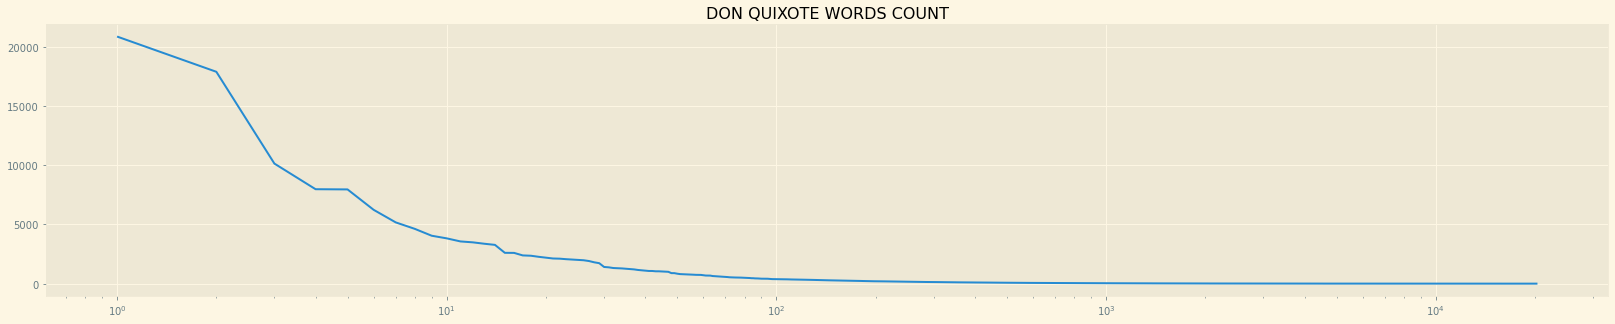

In [37]:
with plt.style.context('Solarize_Light2'):
  plt.figure(figsize=(28,5))
  plt.title("DON QUIXOTE WORDS COUNT")
  plt.plot(dataframe_words_metrics.index+1, dataframe_words_metrics.wordcount)
  plt.xscale('log')
  #plt.yscale('log')

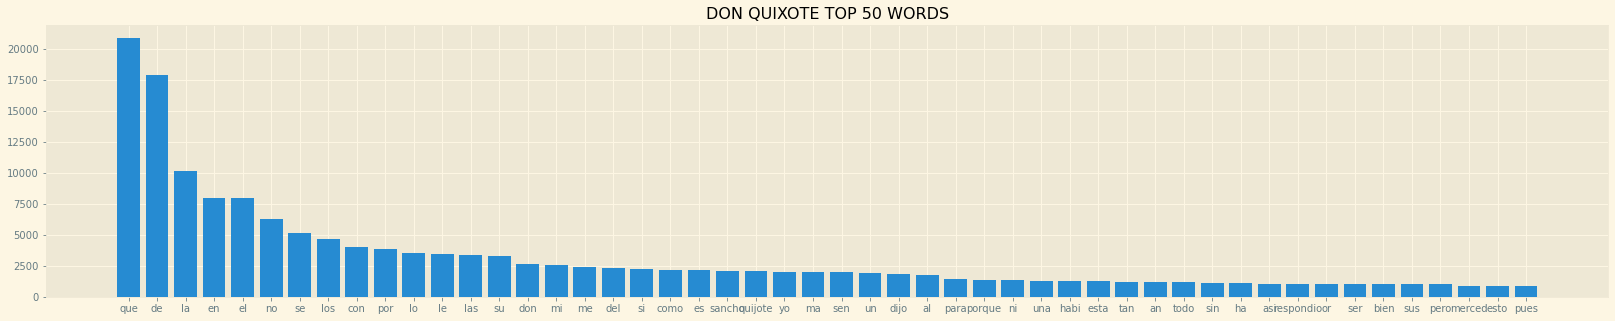

In [38]:
top_words = 50

with plt.style.context('Solarize_Light2'):
  plt.figure(figsize=(28,5))
  plt.title("DON QUIXOTE TOP {top} WORDS".format(top=top_words))
  dataframe_words_metrics_top = dataframe_words_metrics[:top_words]
  plt.bar(dataframe_words_metrics_top.word, dataframe_words_metrics_top.wordcount)

### Zipf's law
Rank-frequency plot for words in the novel Moby-Dick. About 44% of the distinct set of words in this novel, such as "matrimonial", occur only once, and so are hapax legomena (red). About 17%, such as "dexterity", appear twice (so-called dis legomena, in blue). Zipf's law predicts that the words in this plot should approximate a straight line with slope -1.
https://en.wikipedia.org/wiki/Hapax_legomenon#:~:text=hapax%20legomena%3B%20sometimes%20abbreviated%20to,or%20in%20a%20single%20text.

In [59]:
dataframe_wordscount_countfreq = dataframe_quixote_bag_of_words.sum(axis=0).reset_index(False).sort_values(0, ascending=False).reset_index(drop=True)
dataframe_wordscount_countfreq.columns = ['word', 'wordcount']
dataframe_wordscount_countfreq['word_length'] = dataframe_wordscount_countfreq["word"].str.len()

dataframe_wordscount_countfreq = dataframe_wordscount_countfreq.groupby('wordcount').size().reset_index()
dataframe_wordscount_countfreq.columns = ['wordcount', 'countfreq']
dataframe_wordscount_countfreq['countfreq_%'] = 100*dataframe_wordscount_countfreq['countfreq']/dataframe_wordscount_countfreq['countfreq'].sum()
dataframe_wordscount_countfreq

,wordcount,countfreq,countfreq_%
0,1,9341,45.944617
1,2,3077,15.134524
2,3,1631,8.022232
3,4,1014,4.987458
4,5,721,3.546309
...,...,...,...
345,7958,1,0.004919
346,7975,1,0.004919
347,10140,1,0.004919
348,17891,1,0.004919


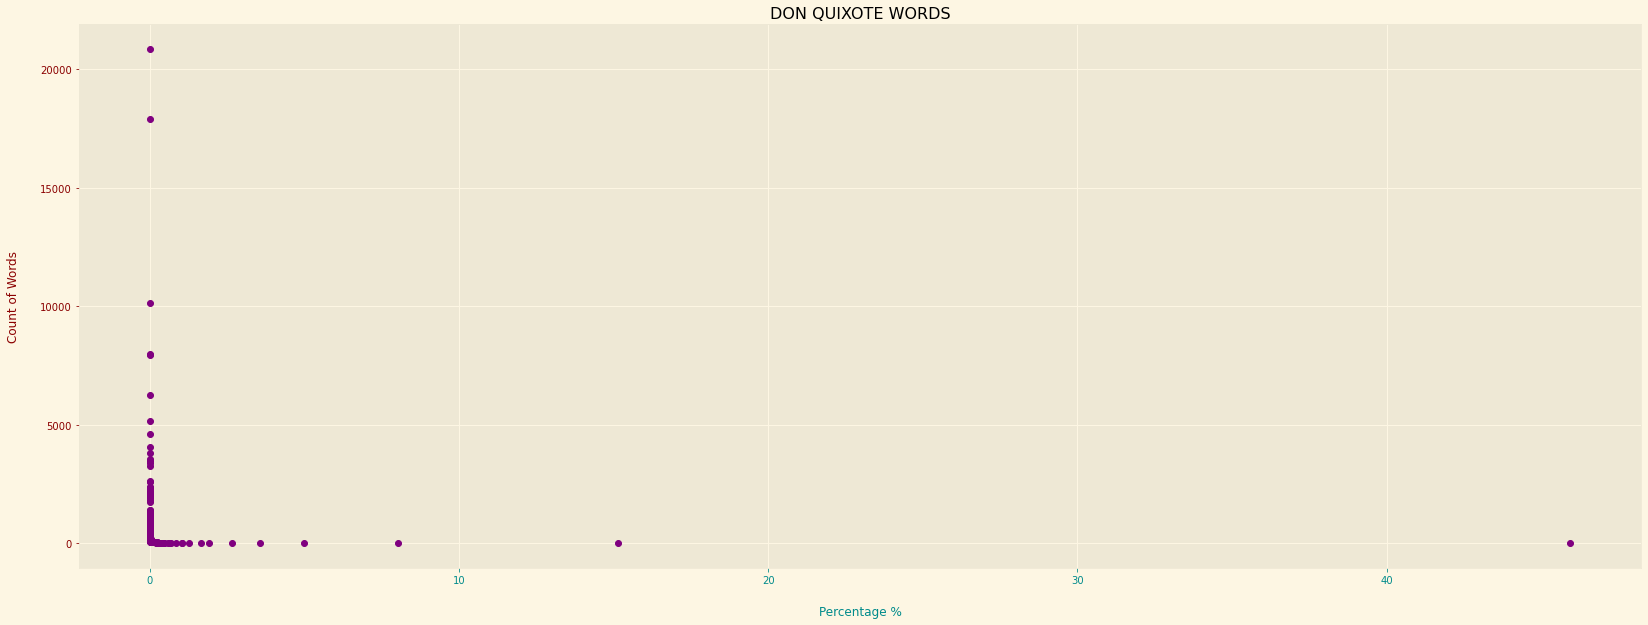

In [70]:
with plt.style.context('Solarize_Light2'):
  plt.figure(figsize=(28,10))
  plt.scatter(x=dataframe_wordscount_countfreq['countfreq_%'], 
              y=dataframe_wordscount_countfreq['wordcount'], color='purple')
  plt.title("DON QUIXOTE WORDS")
  plt.xlabel("Percentage %", labelpad=20, color='darkcyan')
  plt.ylabel("Count of Words", labelpad=20, color='darkred')
  ax = plt.gca()
  ax.tick_params(axis='x', colors='darkcyan')
  ax.tick_params(axis='y', colors='darkred')
  #plt.xscale('log')
  #plt.yscale('log')
  plt.show()

In [78]:
import collections


def generate_zipf_table(text, top):

    """
    Create a list of dictionaries containing the top
    most frequent words, their frequencies and
    other Zipfian data.
    """

    text = _remove_punctuation(text)

    text = text.lower()

    top_word_frequencies = _top_word_frequencies(text, top)

    zipf_table = _create_zipf_table(top_word_frequencies)

    return zipf_table


def _remove_punctuation(text):

    """
    Removes the characters:
    !\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~0123456789
    from the text.
    """

    chars_to_remove = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~0123456789"

    tr = str.maketrans("", "", chars_to_remove)

    return text.translate(tr)


def _top_word_frequencies(text, top):

    """
    Create a list of tuples containing the most
    frequent words and their frequencies
    in descending order.
    """

    # With no argument, split() separates the string
    # by 1 or more consecutive instances of whitespace.
    words = text.split()

    # Create a collections.Counter instance from an
    # iterable, in this case our list of words.
    word_frequencies = collections.Counter(words)

    # most_common() gives us a list of tuples
    # containing words and their frequencies,
    # in descending order of frequency.
    top_word_frequencies = word_frequencies.most_common(top)

    return top_word_frequencies


def _create_zipf_table(frequencies):

    """
    Takes the list created by _top_word_frequencies
    and inserts it into a list of dictionaries,
    along with the Zipfian data.
    """

    zipf_table = []

    top_frequency = frequencies[0][1]

    for index, item in enumerate(frequencies, start=1):

        relative_frequency = "1/{}".format(index)
        zipf_frequency = top_frequency * (1 / index)
        difference_actual = item[1] - zipf_frequency
        difference_percent = (item[1] / zipf_frequency) * 100

        zipf_table.append({"word": item[0],
                           "actual_frequency": item[1],
                           "relative_frequency": relative_frequency,
                           "zipf_frequency": zipf_frequency,
                           "difference_actual": difference_actual,
                           "difference_percent": difference_percent})

    return zipf_table


def print_zipf_table(zipf_table):

    """
    Prints the list created by generate_zipf_table
    in table format with column headings.
    """

    width = 80

    print("-" * width)
    print("|Rank|    Word    |Actual Freq | Zipf Frac  | Zipf Freq  |Actual Diff |Pct Diff|")
    print("-" * width)

    format_string = "|{:4}|{:12}|{:12.0f}|{:>12}|{:12.2f}|{:12.2f}|{:7.2f}%|"

    for index, item in enumerate(zipf_table, start=1):

        print(format_string.format(index,
                                   item["word"],
                                   item["actual_frequency"],
                                   item["relative_frequency"],
                                   item["zipf_frequency"],
                                   item["difference_actual"],
                                   item["difference_percent"]))

    print("-" * width)

In [77]:
zipf_table = zipfslaw.generate_zipf_table(text=dataframe_quixote['ChapterCorpus'], top=135)
zipfslaw.print_zipf_table(zipf_table)

ModuleNotFoundError: No module named 'zipfslaw'

In [80]:
import string
import collections


def count_words(f, clean_text=False):
    """
    Count words in a file.

    Arguments:
        f: an open file handle
        clean_text (optional): a Boolean, if true, filters out boilerplate
            typical of a Gutenberg book.

    Returns:
        A dict keyed by word, with word counts
    """
    text = f.read()
    if clean_text:
        text = _clean_gutenberg_text(text)

    chunks = text.split()
    npunc = [word.strip(string.punctuation) for word in chunks]
    word_list = [word.lower() for word in npunc if word]
    word_counts = collections.Counter(word_list)
    return dict(word_counts)


In [81]:
if __name__ == "__main__":
    parser = argparse.ArgumentParser(description="Compute zipf distribution")
    parser.add_argument("--in_folder", help="the input folder")
    parser.add_argument("--out_folder", help="the output folder")
    args = parser.parse_args()

    main(args)

NameError: name 'argparse' is not defined

### Word lenght

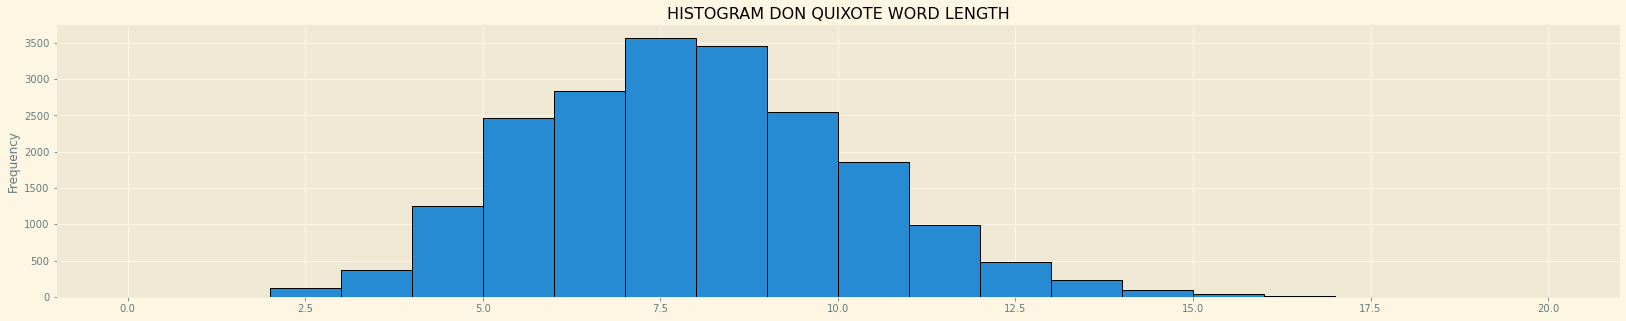

In [46]:
with plt.style.context('Solarize_Light2'):
  plt.figure(figsize=(28,5))
  plt.title("HISTOGRAM DON QUIXOTE WORD LENGTH")
  max_word_length = max(dataframe_words_metrics.word_length)
  dataframe_words_metrics.word_length.plot.hist(grid=True, bins=np.arange(0,max_word_length)+0, ec="k")
  #plt.xscale('log')
  #plt.yscale('log')

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [58]:
dataframe_words_metrics.word_length.reset_index().groupby('word_length').size()

word_length
2      117
3      367
4     1254
5     2461
6     2836
7     3568
8     3454
9     2553
10    1863
11     995
12     486
13     228
14      88
15      42
16      15
17       1
18       1
19       1
21       1
dtype: int64